In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load the data

In [2]:
data = pd.read_csv('data/data-week2.csv', sep=',', decimal='.')
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


## Explore the data

In [3]:
data.describe(include='all')

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,48879,4.889500e+04,48874,48895,48895,48895.000000,48895.000000,48895,48895.000000,48895.000000,48895.000000,38843,38843.000000,48895.000000,48895.000000
unique,NaN,47905,NaN,11452,5,221,NaN,NaN,3,NaN,NaN,NaN,1764,NaN,NaN,NaN
top,NaN,Hillside Hotel,NaN,Michael,Manhattan,Williamsburg,NaN,NaN,Entire home/apt,NaN,NaN,NaN,2019-06-23,NaN,NaN,NaN
freq,NaN,18,NaN,417,21661,3920,NaN,NaN,25409,NaN,NaN,NaN,1413,NaN,NaN,NaN
mean,1.901714e+07,NaN,6.762001e+07,NaN,NaN,NaN,40.728949,-73.952170,NaN,152.720687,7.029962,23.274466,NaN,1.373221,7.143982,112.781327
std,1.098311e+07,NaN,7.861097e+07,NaN,NaN,NaN,0.054530,0.046157,NaN,240.154170,20.510550,44.550582,NaN,1.680442,32.952519,131.622289
min,2.539000e+03,NaN,2.438000e+03,NaN,NaN,NaN,40.499790,-74.244420,NaN,0.000000,1.000000,0.000000,NaN,0.010000,1.000000,0.000000
25%,9.471945e+06,NaN,7.822033e+06,NaN,NaN,NaN,40.690100,-73.983070,NaN,69.000000,1.000000,1.000000,NaN,0.190000,1.000000,0.000000
50%,1.967728e+07,NaN,3.079382e+07,NaN,NaN,NaN,40.723070,-73.955680,NaN,106.000000,3.000000,5.000000,NaN,0.720000,1.000000,45.000000
75%,2.915218e+07,NaN,1.074344e+08,NaN,NaN,NaN,40.763115,-73.936275,NaN,175.000000,5.000000,24.000000,NaN,2.020000,2.000000,227.000000


In [4]:
data.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

## Prepare the data

In [5]:
selected_features = [
    'neighbourhood_group',
    'room_type',
    'latitude',
    'longitude',
    'price',
    'minimum_nights',
    'number_of_reviews',
    'reviews_per_month',
    'calculated_host_listings_count',
    'availability_365',
]

In [6]:
df = data[selected_features]
df.head()

,neighbourhood_group,room_type,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Private room,40.64749,-73.97237,149,1,9,0.21,6,365
1,Manhattan,Entire home/apt,40.75362,-73.98377,225,1,45,0.38,2,355
2,Manhattan,Private room,40.80902,-73.94190,150,3,0,NaN,1,365
3,Brooklyn,Entire home/apt,40.68514,-73.95976,89,1,270,4.64,1,194
4,Manhattan,Entire home/apt,40.79851,-73.94399,80,10,9,0.10,1,0


#### Lower cases on the columns with labels

In [7]:
df.loc[:,'neighbourhood_group'] = df['neighbourhood_group'].str.lower()

/home/valkea/.local/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [8]:
df['neighbourhood_group'].value_counts()

manhattan        21661
brooklyn         20104
queens            5666
bronx             1091
staten island      373
Name: neighbourhood_group, dtype: int64

In [9]:
df.loc[:,'room_type'] = df['room_type'].str.lower()

In [10]:
df['room_type'].value_counts()

entire home/apt    25409
private room       22326
shared room         1160
Name: room_type, dtype: int64

#### Replace missing values with 0

In [11]:
df = df.fillna(0)

### Check types

In [12]:
df.dtypes

neighbourhood_group                object
room_type                          object
latitude                          float64
longitude                         float64
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

---

## Question 1

What is the most frequent observation (mode) for the column 'neighbourhood_group'?

In [111]:
df['neighbourhood_group'].value_counts()

manhattan        21661
brooklyn         20104
queens            5666
bronx             1091
staten island      373
Name: neighbourhood_group, dtype: int64

### ANSWER: 
`manhattan` with 21661 entries

---

## Separate X and y

In [14]:
y = df['price']
y.head(3)

0    149
1    225
2    150
Name: price, dtype: int64

In [15]:
del df['price']
df.head(3)

,neighbourhood_group,room_type,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,brooklyn,private room,40.64749,-73.97237,1,9,0.21,6,365
1,manhattan,entire home/apt,40.75362,-73.98377,1,45,0.38,2,355
2,manhattan,private room,40.80902,-73.94190,3,0,0.00,1,365


## Split the data


- Split your data in train/val/test sets, with 60%/20%/20% distribution.
- Use Scikit-Learn for that (the train_test_split function) and set the seed to 42.
- Make sure that the target value ('price') is not in your dataframe.

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
df_train_full, df_test, y_train_full, y_test = train_test_split(df, y, test_size=0.2, random_state=42)

In [18]:
df_train, df_valid, y_train, y_valid = train_test_split(df_train_full, y_train_full, test_size=df_test.shape[0], random_state=42)

#### Check if the splits sizes

In [19]:
df.shape, df_train_full.shape, df_train.shape, df_valid.shape, df_test.shape

((48895, 9), (39116, 9), (29337, 9), (9779, 9), (9779, 9))

In [20]:
df.shape[0] == (df_train.shape[0] + df_valid.shape[0] + df_test.shape[0])

True

In [21]:
y.shape, y_train_full.shape, y_train.shape, y_valid.shape, y_test.shape

((48895,), (39116,), (29337,), (9779,), (9779,))

In [22]:
y.shape[0] == (y_train.shape[0] + y_valid.shape[0] + y_test.shape[0])

True

---

## Question 2

- Create the correlation matrix for the numerical features of your train dataset.
- In a correlation matrix, you compute the correlation coefficient between every pair of features in the dataset.

What are the two features that have the biggest correlation in this dataset?

In [23]:
numerical = [
    'latitude',
    'longitude',
    #'price',
    'minimum_nights',
    'number_of_reviews',
    'reviews_per_month',
    'calculated_host_listings_count',
    'availability_365',]

categorical = [
    'neighbourhood_group',
    'room_type',
]

In [24]:
df_train[numerical].corr()

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
latitude,1.000000,0.080301,0.027441,-0.006246,-0.007159,0.019375,-0.005891
longitude,0.080301,1.000000,-0.060660,0.055084,0.134642,-0.117041,0.083666
minimum_nights,0.027441,-0.060660,1.000000,-0.076020,-0.120703,0.118647,0.138901
number_of_reviews,-0.006246,0.055084,-0.076020,1.000000,0.590374,-0.073167,0.174477
reviews_per_month,-0.007159,0.134642,-0.120703,0.590374,1.000000,-0.048767,0.165376
calculated_host_listings_count,0.019375,-0.117041,0.118647,-0.073167,-0.048767,1.000000,0.225913
availability_365,-0.005891,0.083666,0.138901,0.174477,0.165376,0.225913,1.000000


In [25]:
df_train[numerical].corr()

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
latitude,1.000000,0.080301,0.027441,-0.006246,-0.007159,0.019375,-0.005891
longitude,0.080301,1.000000,-0.060660,0.055084,0.134642,-0.117041,0.083666
minimum_nights,0.027441,-0.060660,1.000000,-0.076020,-0.120703,0.118647,0.138901
number_of_reviews,-0.006246,0.055084,-0.076020,1.000000,0.590374,-0.073167,0.174477
reviews_per_month,-0.007159,0.134642,-0.120703,0.590374,1.000000,-0.048767,0.165376
calculated_host_listings_count,0.019375,-0.117041,0.118647,-0.073167,-0.048767,1.000000,0.225913
availability_365,-0.005891,0.083666,0.138901,0.174477,0.165376,0.225913,1.000000


In [26]:
corr = df_train[numerical].corr()
for i, n in enumerate(numerical):
    max_col_corr = corr[n].sort_values(ascending=False)[1]
    
    print(corr.columns[i], max_col_corr)

latitude 0.08030088258319117
longitude 0.13464215986450567
minimum_nights 0.13890125161844732
number_of_reviews 0.5903739015971663
reviews_per_month 0.5903739015971663
calculated_host_listings_count 0.22591308547640596
availability_365 0.22591308547640596


### ANSWER: 
`number_of_reviews` and `reviews_per_month` with a correlation of 0.5903739015971663

---

## Make price binary

- We need to turn the price variable from numeric into binary.
- Let's create a variable above_average which is 1 if the price is above (or equal to) 152.


In [27]:
def prepare_y(y):
    above_average = y >= 152
    return  above_average.astype(int)
    
y_bin_train = prepare_y(y_train)
y_bin_train

13575    0
48476    0
44499    0
17382    0
14638    0
        ..
13198    0
14583    0
6168     1
12248    0
20523    0
Name: price, Length: 29337, dtype: int64

---

## Question 3

- Calculate the mutual information score with the (binarized) price for the two categorical variables that we have.
- Use the training set only.
- Round it to 2 decimal digits using round(score, 2)

Which of these two variables has bigger score?



In [28]:
from sklearn.metrics import mutual_info_score

In [29]:
for c in categorical:
    print(f"{c} -> {round(mutual_info_score(y_bin_train, df_train[c]),2)}")

neighbourhood_group -> 0.05
room_type -> 0.14


### ANSWER: 
`room_type` has a highest mutual information score (0.14 vs 0.05)

---

## Question 4

- Now let's train a logistic regression
- Remember that we have two categorical variables in the data.
    - Include them using one-hot encoding.
- Fit the model on the training dataset.
- To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
    - model = LogisticRegression(solver='lbfgs', C=1.0, random_state=42)
    
Calculate the accuracy on the validation dataset and rount it to 2 decimal digits.


### Features scaling

### One-hot encoding

In [30]:
from sklearn.feature_extraction import DictVectorizer

In [31]:
dv = DictVectorizer(sparse=False)

train_dict = df_train[numerical + categorical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)
X_train

array([[ 50.     ,  13.     ,  40.7276 , ...,   1.     ,   0.     ,
          0.     ],
       [  7.     ,   1.     ,  40.70847, ...,   0.     ,   1.     ,
          0.     ],
       [  0.     ,   1.     ,  40.83149, ...,   1.     ,   0.     ,
          0.     ],
       ...,
       [ 88.     ,   1.     ,  40.79994, ...,   0.     ,   1.     ,
          0.     ],
       [  0.     ,   1.     ,  40.69585, ...,   0.     ,   1.     ,
          0.     ],
       [281.     ,   2.     ,  40.64438, ...,   1.     ,   0.     ,
          0.     ]])

In [32]:
dv.feature_names_

['availability_365',
 'calculated_host_listings_count',
 'latitude',
 'longitude',
 'minimum_nights',
 'neighbourhood_group=bronx',
 'neighbourhood_group=brooklyn',
 'neighbourhood_group=manhattan',
 'neighbourhood_group=queens',
 'neighbourhood_group=staten island',
 'number_of_reviews',
 'reviews_per_month',
 'room_type=entire home/apt',
 'room_type=private room',
 'room_type=shared room']

In [33]:
X_train[0]

array([ 50.     ,  13.     ,  40.7276 , -73.94495,   3.     ,   0.     ,
         1.     ,   0.     ,   0.     ,   0.     ,  29.     ,   0.7    ,
         1.     ,   0.     ,   0.     ])

In [34]:
df_train.iloc[0]

neighbourhood_group                      brooklyn
room_type                         entire home/apt
latitude                                  40.7276
longitude                               -73.94495
minimum_nights                                  3
number_of_reviews                              29
reviews_per_month                             0.7
calculated_host_listings_count                 13
availability_365                               50
Name: 13575, dtype: object

### Train logistic regression

In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
model = LogisticRegression(solver='liblinear', C=1.0, random_state=42)
#model = LogisticRegression(solver='lbfgs', C=1.0, random_state=42)

In [37]:
model.fit(X_train, y_bin_train)

LogisticRegression(random_state=42, solver='liblinear')

In [38]:
model.intercept_[0], model.coef_[0].round(3)

(-0.09189354154877066,
 array([ 3.000e-03,  4.000e-03, -5.814e+00, -3.164e+00, -1.100e-02,
        -8.400e-02,  1.250e-01,  1.575e+00, -3.000e-02, -1.677e+00,
        -3.000e-03, -4.200e-02,  1.960e+00, -8.170e-01, -1.235e+00]))

In [39]:
y_bin_train_pred = model.predict(X_train)
y_bin_train_pred

array([0, 0, 0, ..., 0, 0, 1])

In [40]:
acc = (y_bin_train == y_bin_train_pred).mean()
acc.round(2)

0.79

In [41]:
valid_dict = df_valid[numerical + categorical].to_dict(orient='records')
X_valid = dv.fit_transform(valid_dict)

In [42]:
y_bin_valid_pred = model.predict(X_valid)
y_bin_valid_pred

array([0, 1, 0, ..., 0, 0, 1])

In [43]:
y_bin_valid = prepare_y(y_valid)
y_bin_valid

27408    0
7741     0
4771     1
1719     0
19153    1
        ..
31286    1
35694    0
14003    0
13892    0
10029    0
Name: price, Length: 9779, dtype: int64

In [44]:
acc = (y_bin_valid == y_bin_valid_pred).mean()
acc.round(2)

0.79

### ANSWER: 
the validation set accuracy is `0.79` (0.69 is the value when always predicting 0)

---

## Question 5

- We have 9 features: 7 numerical features and 2 categorical.
- Let's find the least useful one using the feature elimination technique.
- Train a model with all these features (using the same parameters as in Q4).
- Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
- For each feature, calculate the difference between the original accuracy and the accuracy without the feature.

Which of following feature has the smallest difference?
- neighbourhood_group
- room_type
- number_of_reviews
- reviews_per_month

note: the difference doesn't have to be positive

In [45]:
from itertools import zip_longest

results = {}

all_features = set(categorical + numerical)
for f in all_features:
    print(f"\nTrain a model with all the features but {f}\n")
    
    rem_set = set([f])
    diff = list(all_features - rem_set)
    
    # one-hot encoding
    train_dict = df_train[diff].to_dict(orient='records')
    X_train = dv.fit_transform(train_dict)
    
    valid_dict = df_valid[diff].to_dict(orient='records')
    X_valid = dv.fit_transform(valid_dict)
    
    # create target values
    y_bin_train = prepare_y(y_train)
    y_bin_valid = prepare_y(y_valid)

    # train on training-set
    # model = LogisticRegression(solver='liblinear', C=1.0, random_state=42)
    model.fit(X_train, y_bin_train)
    
    # predict on training-set
    # y_bin_train_pred = model.predict(X_train)
    # acct = (y_bin_train == y_bin_train_pred).mean()
    
    # predict on validation-set   
    y_bin_valid_pred = model.predict(X_valid)
    
    # compute accuracy
    accv = (y_bin_valid == y_bin_valid_pred).mean()
    
    results[f] = abs(accv-acc)
    
    print(accv.round(3), accv-acc)
    
print("\n")
printed_features = [
    "neighbourhood_group",
    "room_type",
    "number_of_reviews",
    "reviews_per_month",
]
for i,v in enumerate(sorted(results.items(), key=lambda x : x[1])):
    if v[0] in printed_features:
        print(i, v)


Train a model with all the features but neighbourhood_group

0.75 -0.04090397791185196

Train a model with all the features but calculated_host_listings_count

0.789 -0.001329379282135279

Train a model with all the features but room_type

0.729 -0.06196952653645571

Train a model with all the features but latitude

0.787 -0.003988137846405615

Train a model with all the features but longitude

0.787 -0.0037836179568463413

Train a model with all the features but reviews_per_month

0.789 -0.0018406790060333522

Train a model with all the features but number_of_reviews

0.791 0.00040903977911843636

Train a model with all the features but availability_365

0.781 -0.009612434809285308

Train a model with all the features but minimum_nights

0.791 0.0007158196134573469


0 ('number_of_reviews', 0.00040903977911843636)
3 ('reviews_per_month', 0.0018406790060333522)
7 ('neighbourhood_group', 0.04090397791185196)
8 ('room_type', 0.06196952653645571)


### ANSWER: 
the features with the smallest accuracy difference is `number_of_reviews` with 0.0004

---

## Question 6

- For this question, we'll see how to use a linear regression model from Scikit-Learn
- We'll need to use the original column 'price'. Apply the logarithmic transformation to this column.
- Fit the Ridge regression model on the training data.
- This model has a parameter alpha. Let's try the following values: [0, 0.01, 0.1, 1, 10]

Which of these alphas leads to the best RMSE on the validation set? Round your RMSE scores to 3 decimal digits.

- If there are multiple options, select the smallest alpha.

#### Check if the `price` column has long tail

<AxesSubplot:xlabel='price', ylabel='Count'>

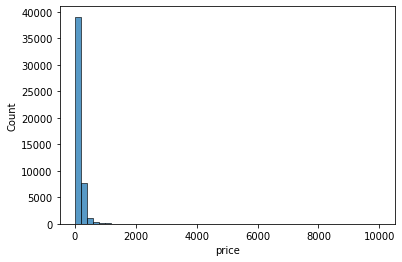

In [103]:
sns.histplot(y, bins=50)

#### Fix long tail with `log`

In [104]:
y_train_full_log = np.log1p(y_train_full)
y_train_log = np.log1p(y_train)
y_valid_log = np.log1p(y_valid)

<AxesSubplot:xlabel='price', ylabel='Count'>

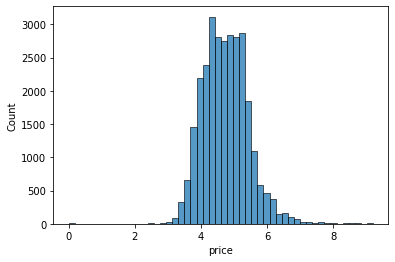

In [105]:
sns.histplot(y_train_log, bins=50)

#### Prepare X training and validation sets

In [106]:
# one-hot encoding
train_dict = df_train[diff].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

valid_dict = df_valid[diff].to_dict(orient='records')
X_valid = dv.fit_transform(valid_dict)

### RMSE

$ rmse = \sqrt{mse} = \sqrt{ \frac{1}{m} \sum_{i=1}^{m}{(se_i)^2} } = \sqrt{ \frac{1}{m} \sum_{i=1}^{m}{(y_i - \hat{y_i})^2} }$

In [107]:
from sklearn.metrics import mean_squared_error

In [110]:
def RMSE(y_true, y_pred):
    se = (y_true - y_pred)**2
    mse = np.mean(se)
    return np.sqrt(mse)

### Train linear regression (ridge) with various alpha values

In [109]:
alphas = [0, 0.01, 0.1, 1, 10]

for a in alphas:
    model = Ridge(alpha=a)
    model.fit(X_train, y_train_log)
    
    y_valid_log_pred = model.predict(X_valid)
    rmse = RMSE(y_valid_log, y_valid_log_pred)
    rmse_sk = mean_squared_error(y_valid_log, y_valid_log_pred, squared=False)
    print(f"alpha: {a} \t RMSE: {rmse:.3f} \t RMSE-sk: {rmse_sk:.3f}\n")
    

alpha: 0 	 RMSE: 0.499 	 RMSE-sk: 0.499

alpha: 0.01 	 RMSE: 0.499 	 RMSE-sk: 0.499

alpha: 0.1 	 RMSE: 0.499 	 RMSE-sk: 0.499

alpha: 1 	 RMSE: 0.499 	 RMSE-sk: 0.499

alpha: 10 	 RMSE: 0.500 	 RMSE-sk: 0.500



### ANSWER:
the best alpha is `0` with an RMSE of 0.499